In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
#Data Preprocessing

#loading the Data
dataset_train = pd.read_csv('/content/Google_Stock_Price_Train.csv')
print('shape is = {}'.format(dataset_train.shape))
print(dataset_train.head())

shape is = (1258, 6)
       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800


In [ ]:
training_set = dataset_train.iloc[:,1:2].values
print('shape is ={}'.format(training_set.shape))
print(training_set[0:5])


shape is =(1258, 1)
[[325.25]
 [331.27]
 [329.83]
 [328.34]
 [322.04]]


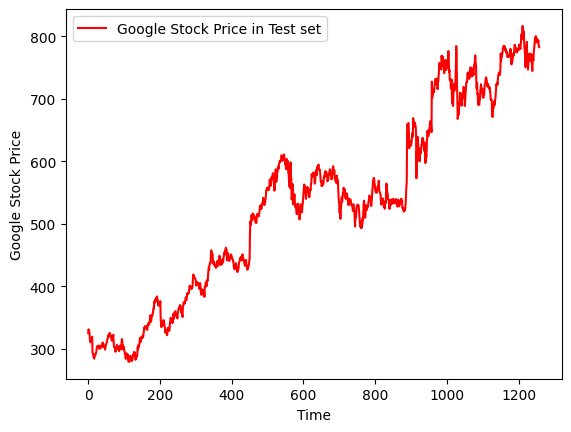

In [ ]:
#Visualizing the Data
plt.plot(training_set, color = 'red', label = 'Google Stock Price in Test set')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [ ]:
#feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)
print(training_set_scaled[0:5])

[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]]


In [ ]:
#preparing the dataset for Training
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

print('X_train shape = {}'.format(X_train.shape))
print('y_train shape = {}'.format(y_train.shape))

X_train shape = (1198, 60)
y_train shape = (1198,)


In [ ]:
#reshaping the input data to fit in Keras RNN
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(1198, 60, 1)

In [ ]:
# Model Development

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
#LSTM Layers with Dropout regularization
regressor = Sequential()
# Adding the first LSTM layer with dropout
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
regressor.add(LSTM(units= 50, return_sequences=True, input_shape = (X_train.shape)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
#Output Layer
regressor.add(Dense(units=1))

In [ ]:
#Compiling the model
regressor.compile(optimizer='adam', loss='mean_squared_error')
#fitting the model
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 14s 133ms/step - loss: 0.0412
Epoch 2/100
38/38 [==============================] - 6s 152ms/step - loss: 0.0076
Epoch 3/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0068
Epoch 4/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0055
Epoch 5/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0056
Epoch 6/100
38/38 [==============================] - 6s 157ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 5s 128ms/step - loss: 0.0058
Epoch 8/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0049
Epoch 9/100
38/38 [==============================] - 7s 179ms/step - loss: 0.0046
Epoch 10/100
38/38 [==============================] - 5s 130ms/step - loss: 0.0044
Epoch 11/100
38/38 [==============================] - 6s 158ms/step - loss: 0.0042
Epoch 12/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0043
Epoch 13/100

In [ ]:
#loading the Data
dataset_test = pd.read_csv('/content/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:,1:2].values


In [ ]:
# Preprocessing the Data
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis=0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
#Output Prediction

#predicting the output
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


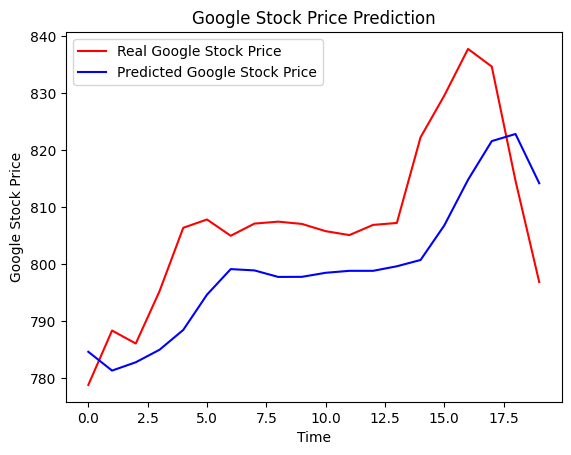

In [ ]:
#Result Visualization

plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
